# Введение в искусственные нейронные сети
# Урок 2. Keras

In [1]:
import numpy as np
#import mnist
import tensorflow as tf
#import tf.kears as keras
import keras
from keras.datasets import mnist, boston_housing, fashion_mnist  # наборы для работы
import matplotlib.pyplot as plt

#train_images = mnist.train_images()
#train_labels = mnist.train_labels()
#test_images = mnist.test_images()
#test_labels = mnist.test_labels()

**Создание модели**

После первичной подготовки данных дальше как правило следует создание модели нейронной сети, которая будет учиться на этих данных.

Ниже типичный код учебной нейросети - 

    # define the keras model
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

Давайте разберемся с теми командами, которые нам встетились в этом коде.

Sequential - позволяет создать нейросети где слои имеют форму стека. Сигнал в них передается от одного слоя к другому. В противовес этой разновидности есть нейросети где сигнал может не сразу передаваться в следующий слой а попадать в цикл. Такие нейросети мы разберем в следующих уроках.

Dense - позволяет каждому нейронну быть связанному с другим нейронном. В противовес этом может быть необходимость не делать так много связей. Неполносвязнные архитектуры мы также разберем на этом курсе, они основа компьютерного зрения.

Цифры 12, 8, 1 обозначают количество нейронов в каждом конкретном слое

Activation - позволяет определить формулу по которой будет активироваться нейрон.

**Компиляция модели**

На этапе компиляции модель с заданными параметрами ранее создается. Вот типичный учебный пример:

    
    # создание keras модели
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Однако на этой стадии мы должны сделать еще некоторые настройки нейронной сети. Разберем команды из кода выше.

loss - позволяет задать формулы по которой будет определяться степень ошибки нейронной сети.

optimizer - позволяет задать алгоритм, который будет осуществлять изменения весов по всей нейронной сети (backpropagation)

metrics - позволяет опредилить кретирии по которым будет оцениваться степень обученности нейросети.
    
    

**Передача данных для обучения нейросети**

После того как нейросеть создана можно передавать ей данные для обучения. Ниже типичный пример кода для этого.


    # передача обучающего датасета keras модели
    model.fit(X, y, epochs=150, batch_size=10, verbose=0)

Разберем команды из этого примера.
X, y - содержат все обучающие данные
epochs - определяет сколько раз через нейросеть должен пройти весь набор данных
bath_size - определяет количество обучающих примеров передающихся нейросети на каждой итерации обучения.
verbose - позволяет определять информацию, котору вы видете во время обучения нейронной сети.

**Оценка обученности нейронной сети**

Следующей стадией может быть проверка обученности нейронной сети. Команда Keras для этих целей - 

    results = model.evaluate(x_test, y_test, batch_size=128)
    
В данном случае мы просто указываем какую модель на каких данных мы хотим проверить

**Запуск нейронной сети для выполнения работы**

На этой стадии мы можем попробовать запустить нейронную сеть на данных которые мы хотели бы чтобы она оценила. Осуществить распознования объекта на фотографии например.
Вот код для этих целей - 

    predictions = model.predict(x_test[:3])
    
В качестве аргумента здесь указывается массив даныхх содержащих, например фотографию в виде массива чисел.    
    

Мы с вами рассмотрели основные стадии процесса обучения нейросети и команды Keras, для этого. Безусловно здесь приведен далеко неполный перечень возможностей Keras. У Keras есть также возможность сохранять созданную нейросеть, запускать уже имеющиюся, различные средства для создания нейросетей разных архитектур и другое. С чем то из арсенала Keras мы с вами познакомимся по ходу курса, а с остальным вы можете познакомиться на сайте Keras в разделе документация.

## Простая нейросеть на Keras

Давайте попрубуем сделать нейросеть на Keras использую полученные выше знания. Попробуем обучить нейросеть различать рукописные цифры.

In [2]:
# Код нейронной сети в Keras!
###############################
import numpy as np
#import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Размер набора входных данных для обучения 

In [3]:
#keras.losses.SparseCategoricalCrossentropy().
#keras.losses.categorical_crossentropy()
# keras.metrics.accuracy

Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…

Функции потерь:
* CategoricalCrossentropy()
* SparseCategoricalCrossentropy()
* BinaryCrossentropy()
* MeanSquaredError()
* KLDivergence()
* CosineSimilarity()
…

Метрики:
* CategoricalAccuracy()
* SparseCategoricalAccuracy()
* BinaryAccuracy()
* AUC()
* Precision()
* Recall()
…

ПОсмотрим из чего она состоит:

126 780 параметров в сети. Все будем обучать.

Как считать параметры слоя: (число входов нейрона +1)*число нейронов


Например, для 5 входов и 10 нейронов в слое - число настраиваемых параметров = (5+1)*10 = 60

Еще один способ создать линейную модель

И можем еще один добавить (продолжаем от предществующего состояния)

Сохраним модель на диск

И еще тренируем (вторую модель)

Эксперимент с разными оптимизаторами для одной начальной модели:

  - создаем модель model
  - сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
  - создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры) 
  - загружаем веса modeli.load_weights('model.h5')
  - компилируем modeli с одним из оптимизаторов
  - вычисляем ошибку для modeli без обучения (т.к. все модели начинают с одной точки, то все ошибки должны быть одинаковые, но будем контролировать это и считаем каждый раз заново)
  - проводим обучение модели и пишем ошибки в истории hh
  - выводим ошибки для 0-го момента и каждой эпохи обучения по тестовой и валидационной частям данных



Оптимизаторы:
* SGD() (с или без моментум)
* RMSprop()
* Adam()
* Adagrad()
…


Посмотрим на результат предсказаний  (inference) для обученной модели (последняя в цикле)

In [4]:
"""N = 9
y_pred = model1.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()  """

'N = 9\ny_pred = model1.predict(test_images[:N,:])\ny_pred_class = np.argmax(y_pred,axis=1)\nplt.figure(figsize =(3*N,5))\nfor i in range(N):\n  plt.subplot(1,N,i+1)\n  plt.imshow(test_images[i,:].reshape(28,28))\n  plt.xlabel(str(y_pred_class[i]))\nplt.show()  '

## Практическое задание

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

Загрузка Fashion_MNIST

In [5]:
from keras.datasets import fashion_mnist
# https://russianblogs.com/article/9980575060/
# 10 категорий - 10 классов - 10 выходных нейронов

In [6]:
def label_names(label):
    labels = {0:'Футболка',1:'Брюки', 2:'Пуловер', 3:'Платье', 4:'Пальто', 
              5:'Сандали', 6:'Рубашка', 7:'Кроссовки', 8:'Сумка/пакет', 9:'Ботильоны'}
    return labels[label]

In [7]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

train_imagef.shape, test_imagef.shape, train_imagef[1,:,:].shape, test_imagef[1,:,:].shape

((60000, 28, 28), (10000, 28, 28), (28, 28), (28, 28))

In [8]:
y_t = to_categorical(train_labelf)
y_tt = to_categorical(test_labelf)
y_t.shape, y_tt.shape

((60000, 10), (10000, 10))

In [9]:
ind=np.where(train_labelf==2)[0]
len(ind)

6000

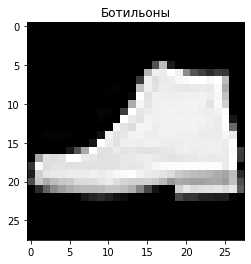

In [10]:
plt.gray()
result = np.where(train_labelf == 9)
n = result[0][3]
plt.imshow(train_imagef[n,:,:])
plt.title(label_names(train_labelf[n]))
plt.show()

## Создаем модель

In [13]:
model_hw = Sequential(name='fashion_model')
model_hw.add(Flatten(input_shape=[28, 28]))
model_hw.add(Dense(128, activation='relu', input_shape=(28,28,)))  #28x28=784
# входной слой + поносвязный слой из 128 нейронов с активацией ReLU
for k in range(3):
  model_hw.add(Dense(  10+round((10-11*k)*10), activation='tanh')) 
  # Скрытый слой k из 10+(10-k)*10 нейронов с активацией tanh

model_hw.add(Dense(10, activation='softmax')) 
# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax

#Компилируем сеть с оптимизатором , функцией потерь и метрикой:
model_hw.compile(
  optimizer='adam', # оптимизатор
  loss=keras.losses.CategoricalCrossentropy(), # функция потерь
  metrics=['accuracy'], # метрика
) 

"""# Build the model.
model = Sequential([
  Dense(128, activation='tanh', input_shape=(784,)),
  Dense(110, activation='tanh'), # Скрытый слой из 110 нейронов с активацией tanh
  Dense(100, activation='tanh'), # Скрытый слой k из 100 нейронов с активацией tanh
  Dense(10, activation='softmax'),# выходной слой из 10 нейронов (сколько классов, столько нейронов) + активация softmax
])

# Compile the model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)"""

ValueError: Dimension -110 must be >= 0

In [ ]:
model_hw.get_config()

In [ ]:
# Train the model.
model_hw.fit(    
  train_imagef,
  y_t,
  epochs=5,
  batch_size=32, validation_split=0.2
)

# Evaluate the model.
model_hw.evaluate( 
  test_imagef,
  y_tt
)

In [ ]:
def accuracy_calc(data, model, real_val):
    y_pred = model.predict(data)
    maxpos = lambda x : np.argmax(x)
    y_pred_max = np.array([maxpos(rec) for rec in y_pred])
    accuracy = sum(y_pred_max == real_val)/len(y_pred_max)
    return accuracy

In [ ]:
(650-10)/10
#10+(10+x)+(10+2x)
34/3

In [ ]:
print(f'Train accuracy - {accuracy_calc(train_imagef, model_hw, train_labelf)}')
print(f'Test accuracy - {accuracy_calc(test_imagef, model_hw, test_labelf)}')
"""
epochs=5, 2 hidden layers, neurons: 128-110-100-10
Train accuracy - 0.53705
Test accuracy - 0.529
"""
"""
epochs=5, 2 hidden layers, neurons: 256-110-100-10
Train accuracy - 0.5573333333333333
Test accuracy - 0.5495
"""
"""
epochs=5, 2 hidden layers, neurons: 128-210-190-10
Train accuracy - 0.6787833333333333
Test accuracy - 0.6683
"""
"""
epochs=5, 10 hidden layers, neurons: 128-110-100...-20-10
Train accuracy - 0.40485
Test accuracy - 0.405
"""
"""
epochs=5, 10 hidden layers, neurons: 128-110-96-82...-54-10
Train accuracy - 0.6177666666666667
Test accuracy - 0.6129
"""

In [ ]:

#keras.metrics.Accuracy(test_labelf, y_pred)
keras.metrics.categorical_accuracy(test_labelf, y_pred), y_pred.shape, test_labelf.shape

In [ ]:
keras.metrics -H

In [ ]:
"""model_hw.fit(
  train_images,
  y_t,
  epochs=15,
  batch_size=1024, validation_split=0.2
)"""

In [ ]:
def show_preds(data, predictions, real_cat):
    plt.gray()
    for i in range(data.shape[0]):
        plt.imshow(data[i,:,:])
        title_str = f'Predicted category - {label_names(np.argmax(predictions[i]))}, ' 
        title_str += f'{np.round(np.max(predictions[i])*100)}% \nReal category - {label_names(real_cat)}'
        plt.title(title_str)
        plt.show()

In [ ]:
category = 5
predictions = model_hw.predict(test_imagef[np.where(test_labelf == category)[0][:10],:])

predictions.shape, predictions[3]

In [ ]:
show_preds(test_imagef[np.where(test_labelf == category)[0][:5],:], predictions, category)

In [ ]:
# сохранить веса модели.
model_hw.save_weights('model_hw.h5')

# загрузить веса модели:
# model.load_weights('model.h5')


In [ ]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs+1)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
  modeli = Sequential([
                      Flatten(input_shape=[28, 28]),
                      Dense(128, activation='relu', input_shape=(28,28,)),
                      Dense(110, activation='tanh'),
                      Dense(100, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
  # загружаем веса modeli.load_weights('model.h5')
  modeli.load_weights('model_hw.h5')
  # компилируем modeli с одним из оптимизаторов
  modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
  # вычисляем ошибку для modeli без обучения
  hh0_tr = modeli.evaluate(train_imagef[:48000,:,:], y_t[:48000], verbose = 0)
  hh0_val = modeli.evaluate(train_imagef[48000:,:,:], y_t[48000:], verbose = 0)
  # проводим обучение модели 
  hh = modeli.fit(
                  train_imagef,
                  y_t,
                  epochs=epochs,
                  batch_size=32, validation_split=0.2, verbose = 0
                  )
  # картинки
  plt.plot(epoch,np.log([hh0_tr[0]]+hh.history['loss']),'-',label = modeli.optimizer.get_config()['name']+' train')
  plt.plot(epoch,np.log([hh0_val[0]]+hh.history['val_loss']),'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора log(loss)')
plt.xlabel('epoch')
plt.ylabel('log(loss)')
plt.show()


## Дополнительные материалы

<ol>
    <li> https://keras.io/</li>
    <li> https://playground.tensorflow.org/ - визуализация сетей 
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://keras.io/</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Саймон Хайкин — Нейронные сети: полный курс</li>
    <li>Википедия</li>
    
</ol>